In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
print(os.listdir())
import warnings
warnings.filterwarnings('ignore')

['.config', 'Crop_recommendation.csv', 'sample_data']


In [ ]:
dataset = pd.read_csv("/content/Crop_recommendation.csv")

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
info = ["Nitrogen level in the soil (N)",
        "Phosphorus level in the soil (P)",
        "Potassium level in the soil (K)",
        "Temperature in Celsius",
        "Humidity percentage",
        "pH value of the soil",
        "Rainfall in mm",
        "Recommended crop"]

for i in range(len(info)):
    print(dataset.columns[i] + ":\t\t" + info[i])

N:		Nitrogen level in the soil (N)
P:		Phosphorus level in the soil (P)
K:		Potassium level in the soil (K)
temperature:		Temperature in Celsius
humidity:		Humidity percentage
ph:		pH value of the soil
rainfall:		Rainfall in mm
label:		Recommended crop


In [ ]:
dataset["label"].describe()

,label
count,2200
unique,22
top,rice
freq,100


In [ ]:
dataset["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

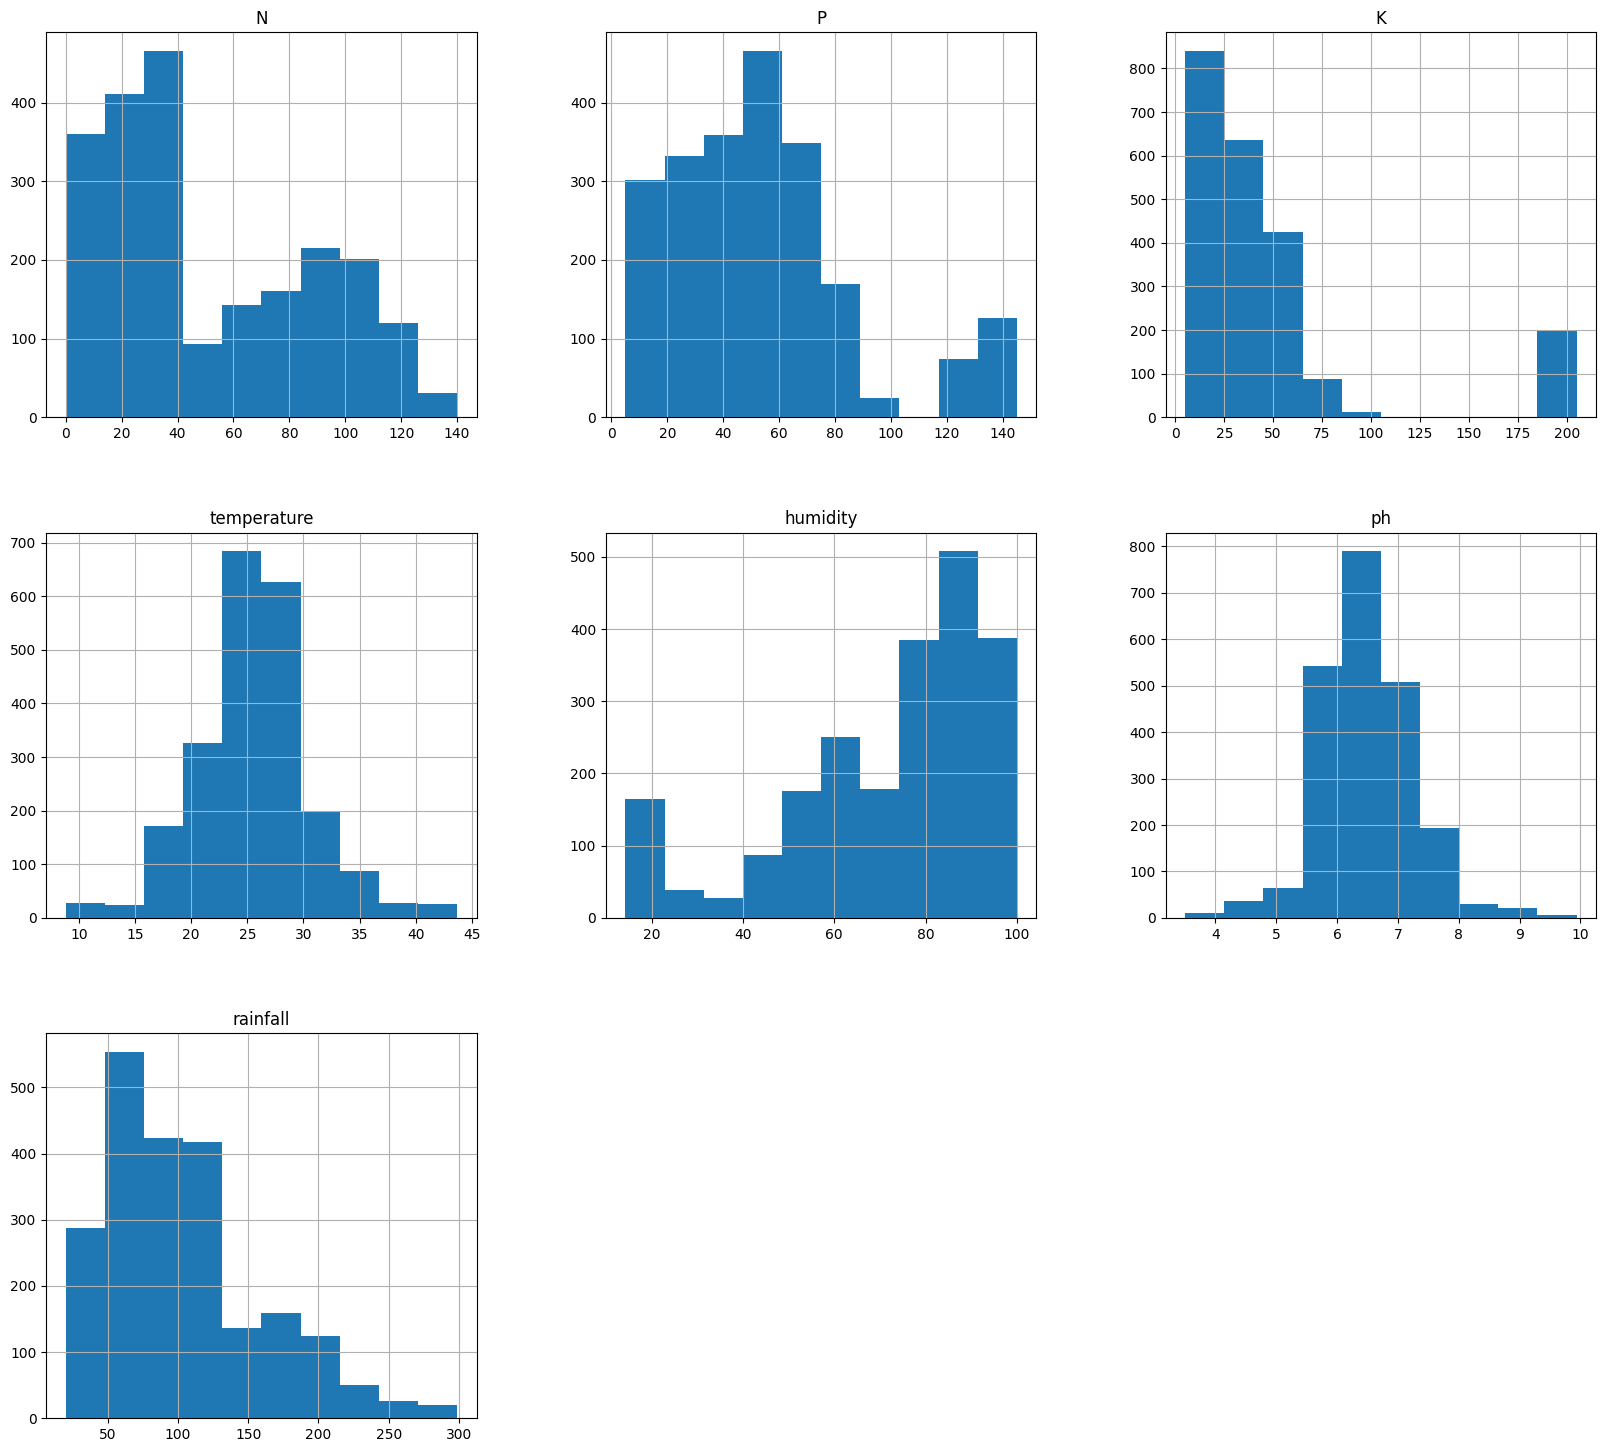

In [ ]:
dataset.hist(figsize=(20, 18))
plt.show()

In [ ]:
# prompt: check the missing values and replace with mean

# Check for missing values
print(dataset.isnull().sum())

# Replace missing values with the mean (if any)
for column in dataset.columns:
  if dataset[column].isnull().any():
    dataset[column].fillna(dataset[column].mean(), inplace=True)

# Verify that missing values have been replaced
print(dataset.isnull().sum())


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Get the unique labels in the original order they appear
unique_labels = pd.unique(dataset['label'])

# Manually set the classes of LabelEncoder without it sorting them
label_encoder.classes_ = unique_labels

# Transform the 'label' column
dataset['label'] = label_encoder.transform(dataset['label'])

# Print the first few rows to check the changes
print(dataset.head())

# View the mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping: ", label_mapping)

    N   P   K  temperature   humidity        ph    rainfall  label
0  90  42  43    20.879744  82.002744  6.502985  202.935536      0
1  85  58  41    21.770462  80.319644  7.038096  226.655537      0
2  60  55  44    23.004459  82.320763  7.840207  263.964248      0
3  74  35  40    26.491096  80.158363  6.980401  242.864034      0
4  78  42  42    20.130175  81.604873  7.628473  262.717340      0
Label Mapping:  {'rice': 0, 'maize': 1, 'chickpea': 2, 'kidneybeans': 3, 'pigeonpeas': 4, 'mothbeans': 5, 'mungbean': 6, 'blackgram': 7, 'lentil': 8, 'pomegranate': 9, 'banana': 10, 'mango': 11, 'grapes': 12, 'watermelon': 13, 'muskmelon': 14, 'apple': 15, 'orange': 16, 'papaya': 17, 'coconut': 18, 'cotton': 19, 'jute': 20, 'coffee': 21}


In [ ]:
# prompt: seperate the features and labels

X = dataset.drop('label', axis=1)
y = dataset['label']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
print(dataset.corr()["label"].abs().sort_values(ascending=True))


ph             0.052389
rainfall       0.121486
K              0.143703
P              0.167951
temperature    0.180571
N              0.282787
humidity       0.524452
label          1.000000
Name: label, dtype: float64


In [ ]:
# Assuming `dataset` is your DataFrame
for column in dataset.columns:
    print(f"Unique values in '{column}': {dataset[column].unique()}\n")


Unique values in 'N': [ 90  85  60  74  78  69  94  89  68  91  93  77  88  76  67  83  98  66
  97  84  73  92  95  99  63  62  64  82  79  65  75  71  72  70  86  61
  81  80 100  87  96  40  23  39  22  36  32  58  59  42  28  43  27  50
  25  31  26  54  57  49  46  38  35  52  44  24  29  20  56  37  51  41
  34  30  33  47  53  45  48  13   2  17  12   6  10  19  11  18  21  16
   9   1   7   8   0   3   4   5  14  15  55 105 108 118 101 106 109 117
 114 110 112 111 102 116 119 107 104 103 120 113 115 133 136 126 121 129
 122 140 131 135 123 125 139 132 127 130 134]

Unique values in 'P': [ 42  58  55  35  37  53  54  46  56  50  48  38  45  40  59  41  47  49
  51  57  39  43  44  60  52  36  72  67  73  70  62  74  66  63  71  78
  80  68  65  77  76  79  61  64  69  75  24  18  26  27  25  21  30  11
   5  10   7  20  22  15  23   8  16  29  17   6  19  13   9  14  28  94
  95  92  89  88  87  85  86  83  91  81  84  90  82  93  33  31  34  32
 130 144 123 125 131 140 122 134 

label
0     100
1     100
20    100
19    100
18    100
17    100
16    100
15    100
14    100
13    100
12    100
11    100
10    100
9     100
8     100
7     100
6     100
5     100
4     100
3     100
2     100
21    100
Name: count, dtype: int64


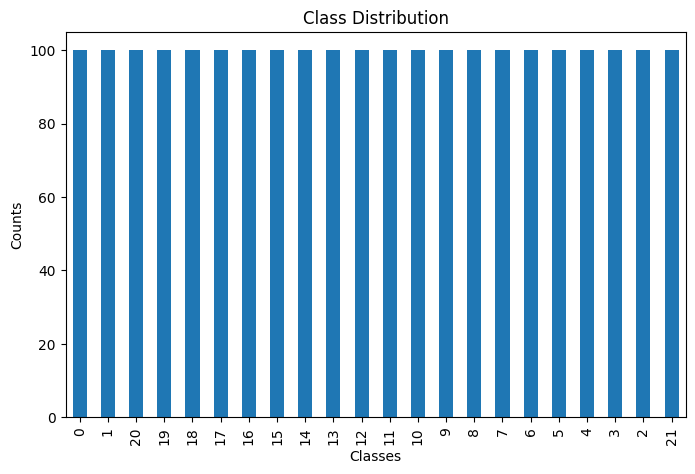

In [ ]:
class_counts = dataset['label'].value_counts()

# Display class counts
print(class_counts)

# Plot class distribution
plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.show()

In [ ]:
total_instances = len(dataset)

# Calculate the proportion of each class
class_proportions = class_counts / total_instances

# Display proportions
print(class_proportions)

# Check if any class exceeds your threshold
threshold = 0.7  # Example threshold for imbalance
imbalanced_classes = class_proportions[class_proportions > threshold]
print("Imbalanced classes based on threshold:", imbalanced_classes)

label
0     0.045455
1     0.045455
20    0.045455
19    0.045455
18    0.045455
17    0.045455
16    0.045455
15    0.045455
14    0.045455
13    0.045455
12    0.045455
11    0.045455
10    0.045455
9     0.045455
8     0.045455
7     0.045455
6     0.045455
5     0.045455
4     0.045455
3     0.045455
2     0.045455
21    0.045455
Name: count, dtype: float64
Imbalanced classes based on threshold: Series([], Name: count, dtype: float64)


In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

y_encoded = label_encoder.fit_transform(y)

k_best = 5  # Select top 5 features
anova_selector = SelectKBest(f_classif, k=k_best)
X_anova = anova_selector.fit_transform(X_scaled, y_encoded)

# Get selected features based on ANOVA F-Test (indices)
anova_selected_features = anova_selector.get_support(indices=True)
anova_selected_feature_names = X.columns[anova_selected_features]  # Map indices to names


# Print results
print(f"ANOVA selected features: {anova_selected_feature_names}")



ANOVA selected features: Index(['N', 'P', 'K', 'humidity', 'rainfall'], dtype='object')


In [ ]:
# prompt: split the data into traing and testing

from sklearn.model_selection import train_test_split

# Assuming X_anova contains the selected features and y_encoded contains the labels
X_train, X_test, y_train, y_test = train_test_split(X_anova, y_encoded, test_size=0.2, random_state=42) # Adjust test_size as needed

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1760, 5)
X_test shape: (440, 5)
y_train shape: (1760,)
y_test shape: (440,)


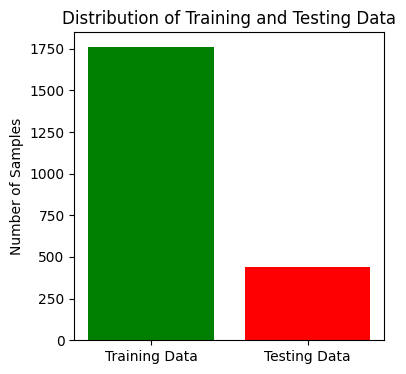

In [ ]:
plt.figure(figsize=(4, 4))
plt.bar(['Training Data', 'Testing Data'], [len(X_train), len(X_test)], color=['green', 'red'])
plt.title('Distribution of Training and Testing Data')
plt.ylabel('Number of Samples')
plt.show()


**Logistic Regression**
Accuracy: 0.9500
Precision: 0.9559
Recall: 0.9500
F1-score: 0.9506


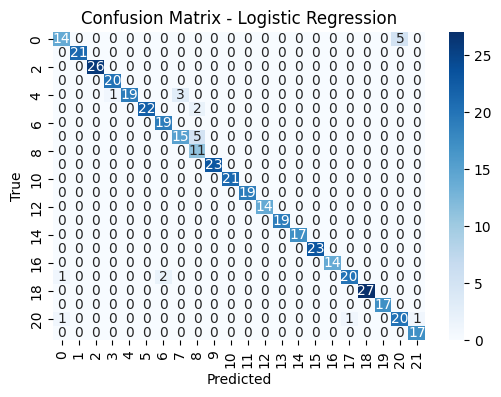


**Naive Bayes**
Accuracy: 0.9909
Precision: 0.9919
Recall: 0.9909
F1-score: 0.9909


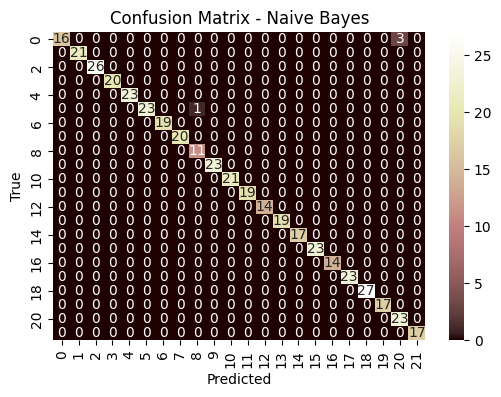


**KNN**
Accuracy: 0.9682
Precision: 0.9725
Recall: 0.9682
F1-score: 0.9684


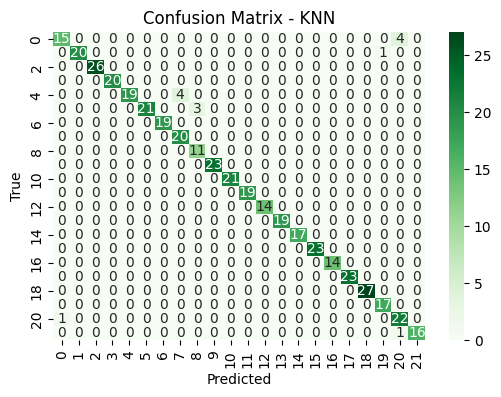


**Decision Tree**
Accuracy: 0.9886
Precision: 0.9890
Recall: 0.9886
F1-score: 0.9886


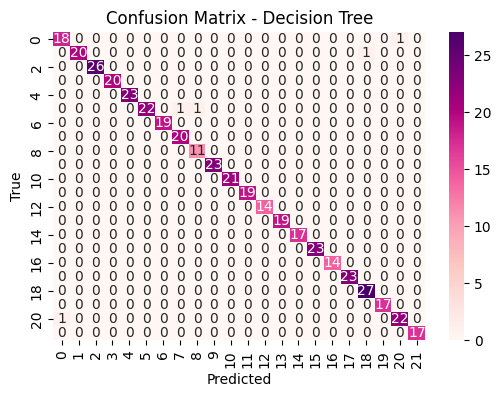


**SVM**
Accuracy: 0.9636
Precision: 0.9687
Recall: 0.9636
F1-score: 0.9634


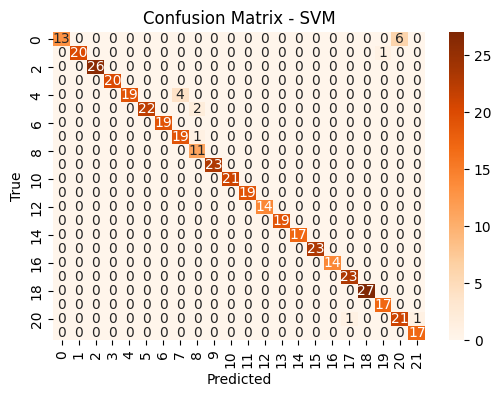


**Gradient Boosting**
Accuracy: 0.9864
Precision: 0.9876
Recall: 0.9864
F1-score: 0.9865


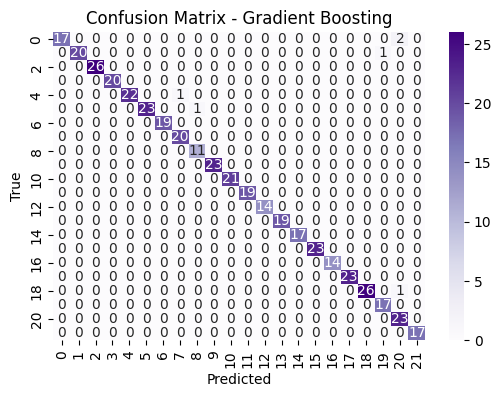

In [ ]:


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier



models = [
    ("Logistic Regression", LogisticRegression()),
    ("Naive Bayes", GaussianNB()),
    ("KNN", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("SVM", SVC()),
    ("Gradient Boosting", GradientBoostingClassifier()),
]

color_cycle = ['Blues', 'pink', 'Greens', 'RdPu', 'Oranges', 'Purples', 'YlGnBu']
color_index = 0

for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n**{model_name}**")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Display the confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap=color_cycle[color_index % len(color_cycle)])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    color_index += 1



In [ ]:

models = [
    ("Logistic Regression", LogisticRegression()),
    ("Naive Bayes", GaussianNB()),
    ("KNN", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("SVM", SVC()),
    ("Gradient Boosting", GradientBoostingClassifier())
]


for model_name, model in models:
  # Train the model
  model.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)

  print(f"\n**{model_name}**")
  print(f"Accuracy: {accuracy:.4f}")


**Logistic Regression**
Accuracy: 0.9500

**Naive Bayes**
Accuracy: 0.9909

**KNN**
Accuracy: 0.9682

**Decision Tree**
Accuracy: 0.9886

**SVM**
Accuracy: 0.9636

**Gradient Boosting**
Accuracy: 0.9864


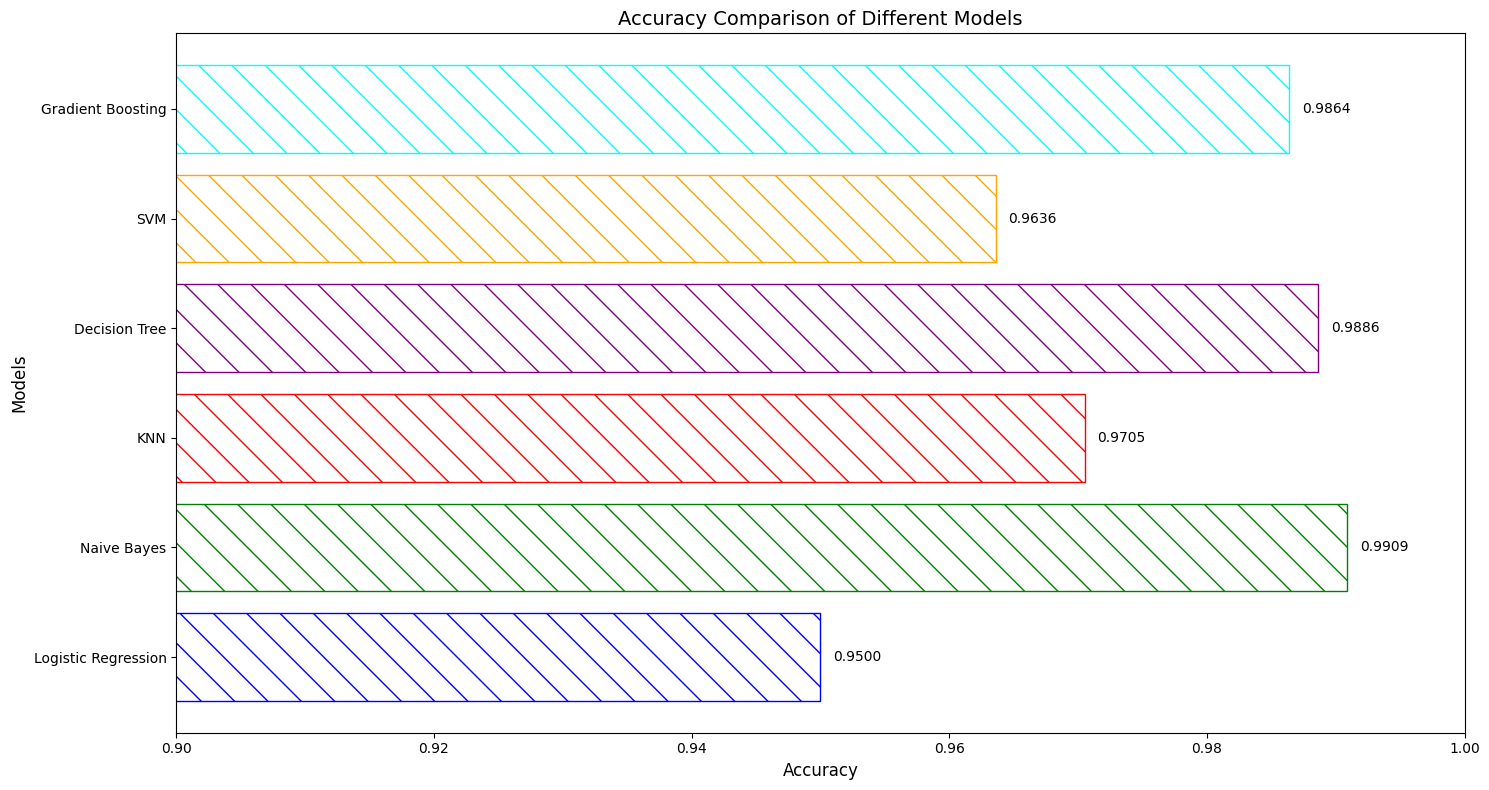

In [ ]:
import matplotlib.pyplot as plt

# Model names and corresponding accuracies
models = ['Logistic Regression', 'Naive Bayes', 'KNN', 'Decision Tree','SVM', 'Gradient Boosting']
accuracies = [0.9500, 0.9909, 0.9705, 0.9886, 0.9636, 0.9864]

# Define different hatch patterns and colors for each bar
hatches = ['\\', '\\', '\\', '\\', '\\', '\\','\\']
border_colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

# Create a horizontal bar chart
plt.figure(figsize=(15, 8))
bars = plt.barh(models, accuracies, color='white')

# Add hatch patterns and different colored borders to each bar
for bar, hatch, color in zip(bars, hatches, border_colors):
    bar.set_hatch(hatch)
    bar.set_edgecolor(color)

# Add titles and labels
plt.title('Accuracy Comparison of Different Models', fontsize=14)
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Models', fontsize=12)
plt.xlim(0.9, 1.0)  # Set x-axis limits to focus on high accuracy range

# Display accuracy values at the end of each bar
for i, acc in enumerate(accuracies):
    plt.text(acc + 0.001, i, f'{acc:.4f}', va='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# prompt:  metrics which are precision,f1 score,recall in a table for each model

from tabulate import tabulate

models = [
    ("Logistic Regression", LogisticRegression()),
    ("Naive Bayes", GaussianNB()),
    ("KNN", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("SVM", SVC()),
    ("Gradient Boosting", GradientBoostingClassifier())
]

results = []
for model_name, model in models:
  # Train the model
  model.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  # Evaluate the model
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')

  results.append([model_name, precision, recall, f1])

# Create a table using tabulate
table = tabulate(results, headers=["Model", "Precision", "Recall", "F1-score"], tablefmt="grid")

print(table)

+---------------------+-------------+----------+------------+
| Model               |   Precision |   Recall |   F1-score |
+=====================+=============+==========+============+
| Logistic Regression |    0.955937 | 0.95     |   0.950574 |
+---------------------+-------------+----------+------------+
| Naive Bayes         |    0.991885 | 0.990909 |   0.990851 |
+---------------------+-------------+----------+------------+
| KNN                 |    0.972542 | 0.968182 |   0.968373 |
+---------------------+-------------+----------+------------+
| Decision Tree       |    0.993593 | 0.993182 |   0.993164 |
+---------------------+-------------+----------+------------+
| SVM                 |    0.968651 | 0.963636 |   0.96342  |
+---------------------+-------------+----------+------------+
| Gradient Boosting   |    0.987574 | 0.986364 |   0.986457 |
+---------------------+-------------+----------+------------+


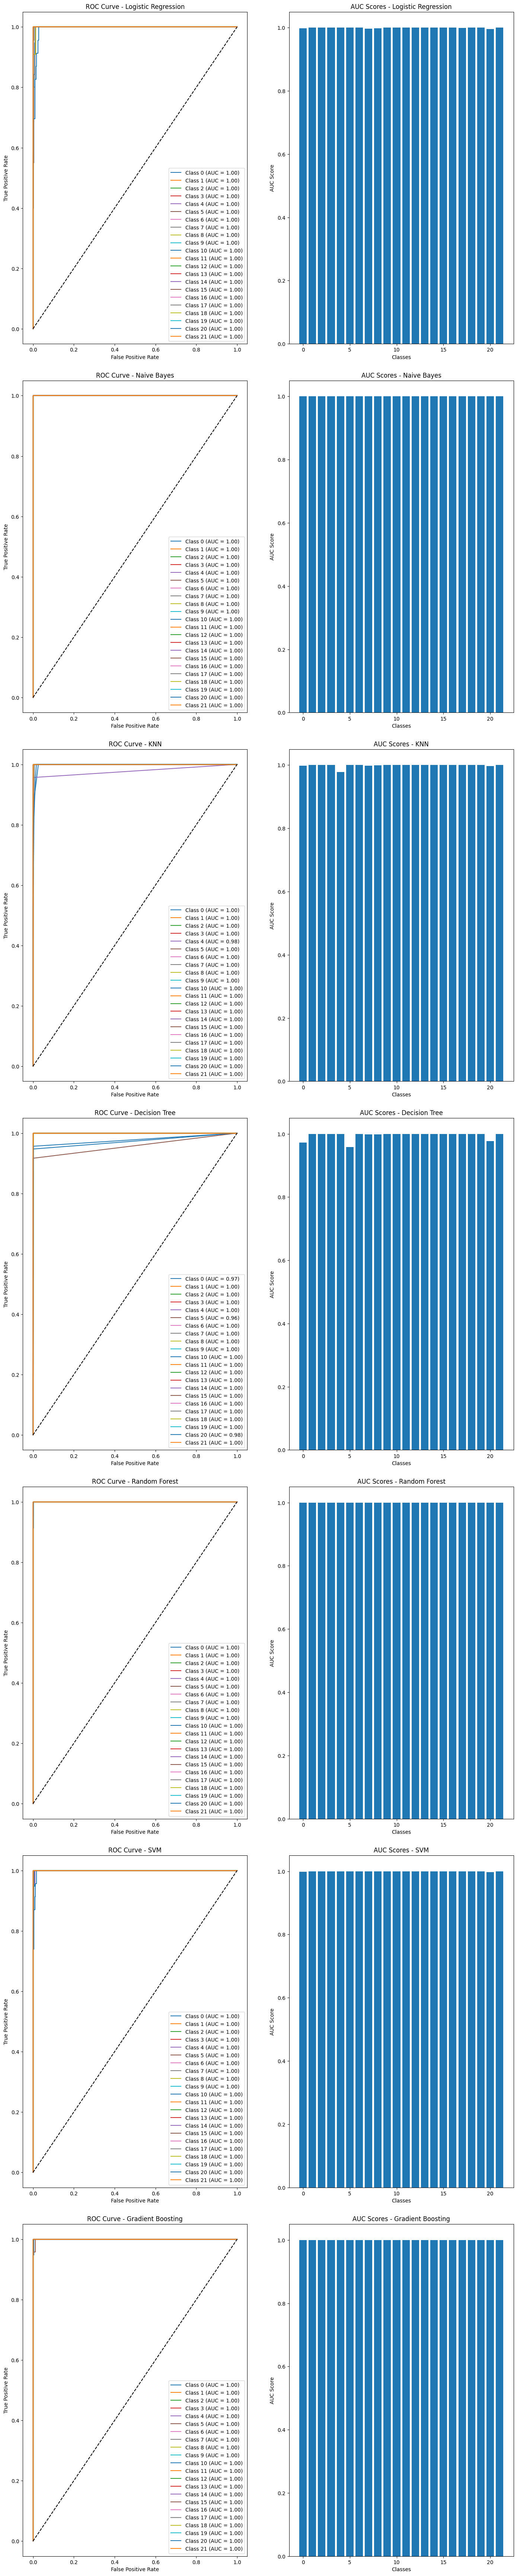

In [ ]:
# prompt: roc and auc curve

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

models = [
    ("Logistic Regression", LogisticRegression()),
    ("Naive Bayes", GaussianNB()),
    ("KNN", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC(probability=True)),  # Enable probability estimates for ROC curve
    ("Gradient Boosting", GradientBoostingClassifier())
]

# Binarize the labels for multi-class ROC curves
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

fig, axs = plt.subplots(len(models), 2, figsize=(15, 10 * len(models)))
fig.tight_layout(pad=5.0)

for i, (model_name, model) in enumerate(models):
  # Train the model
  model.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = model.predict(X_test)
  y_score = model.predict_proba(X_test)


  # ROC Curve
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for j in range(y_test_bin.shape[1]):
    fpr[j], tpr[j], _ = roc_curve(y_test_bin[:, j], y_score[:, j])
    roc_auc[j] = auc(fpr[j], tpr[j])

  # Plot ROC curve for each class
  axs[i, 0].set_title(f"ROC Curve - {model_name}")
  for j in range(y_test_bin.shape[1]):
      axs[i, 0].plot(fpr[j], tpr[j], label=f'Class {j} (AUC = {roc_auc[j]:.2f})')
  axs[i, 0].plot([0, 1], [0, 1], 'k--')
  axs[i, 0].set_xlabel('False Positive Rate')
  axs[i, 0].set_ylabel('True Positive Rate')
  axs[i, 0].legend(loc="lower right")


  # AUC
  # Calculate AUC for each class
  auc_scores = [roc_auc[j] for j in range(y_test_bin.shape[1])]

  # Plot AUC scores
  axs[i, 1].set_title(f"AUC Scores - {model_name}")
  axs[i, 1].bar(range(len(auc_scores)), auc_scores)
  axs[i, 1].set_xlabel('Classes')
  axs[i, 1].set_ylabel('AUC Score')


plt.show()